<a href="https://colab.research.google.com/github/spqjf12345/NLP-TIL/blob/main/5_%ED%8A%B8%EB%A6%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(4872, 3) (1625, 3)
0.7859195402298851
0.7655384615384615
0.9973316912972086
0.8516923076923076


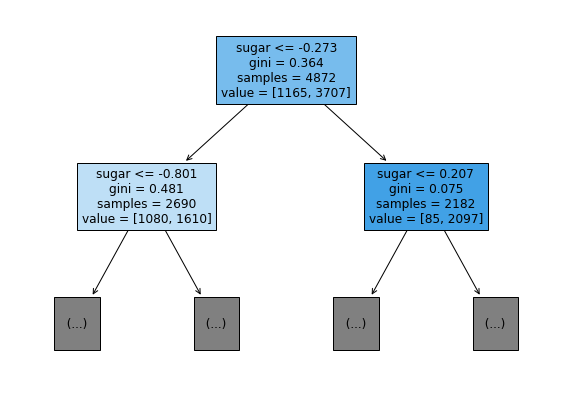

In [1]:
#05 - 1 결정 트리
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

#wine.head()
#wine.describe()

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state = 42)

print(train_input.shape, test_input.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [2]:
#05-02
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#sub 추출을 위해 2번 적용
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

print(sub_input.shape, val_input.shape, test_input.shape)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores) 

import numpy as np
print(np.mean(scores['test_score']))

from sklearn.model_selection import StratifiedKFold
scores= cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

#10번 교차 검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

from sklearn.model_selection import GridSearchCV
params= {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_input, train_target) #교차 검증에 사용한 훈련 세트가 아니라 전체 훈련 세트 사용하여 최종 모델 훈련
dt = gs.best_estimator_

print(dt.score(train_input, train_target))
print(gs.best_params_)
#교차 검증 평균 점수
print(gs.cv_results_['mean_test_score'])

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001), 'max_depth' : range(5, 20, 1), 'min_samples_split' : range(2, 100, 10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
#gs.fit(train_input, train_target) #교차 검증에 사용한 훈련 세트가 아니라 전체 훈련 세트 사용하여 최종 모델 훈련
#print(gs.best_params_)
#dt = gs.best_estimator_

#랜덤 서치
from scipy.stats import uniform, randint
rgen = randint(0, 10)
rgen.rvs(10)

np.unique(rgen.rvs(1000), return_counts=True)

ugen = uniform(0, 1)
ugen.rvs(10)


params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)
print(gs.best_params_)

(4157, 3) (1040, 3) (1300, 3)
0.9971133028626413
0.864423076923077
{'fit_time': array([0.01186466, 0.01548529, 0.01447868, 0.01642013, 0.01412535]), 'score_time': array([0.00131345, 0.00289178, 0.00141501, 0.00130224, 0.00845456]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487
0.855300214703487
0.8574181117533719
0.9615162593804117
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]
{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [3]:
#05-3 트리 앙상블
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

from sklearn.model_selection import cross_validate

#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, train_input, train_target, return_train_score= True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

rf.fit(train_input, train_target)
print(rf.feature_importances_)

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

#엑스트라 트리
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target, return_train_score= True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score= True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score= True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(train_input, train_target)
print(gb.feature_importances_)

#히스토그램 그래디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats= 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

hgb.score(test_input, test_target)

from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9973541965122431 0.8905151032797809
[0.23167441 0.50039841 0.26792718]
0.8934000384837406
0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]
0.8881086892152563 0.8720430147331015
0.9464595437171814 0.8780082549788999
[0.15872278 0.68010884 0.16116839]
0.9321723946453317 0.8801241948619236
[0.08876275 0.23438522 0.08027708]
0.8824322471423747 0.8726214185237284
0.9338079582727165 0.8789710890649293
